In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Plant Village Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Plant Village Dataset/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=17,activation='softmax'))

cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

cnn.summary()

training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)



Found 16908 files belonging to 17 classes.
Found 3616 files belonging to 17 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 17)                  │          25,517 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,811,241 (29.80 MB)

 Trainable params: 7,811,241 (29.80 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
529/529 ━━━━━━━━━━━━━━━━━━━━ 3090s 6s/step - accuracy: 0.4112 - loss: 1.8806 - val_accuracy: 0.8070 - val_loss: 0.5769
Epoch 2/10
529/529 ━━━━━━━━━━━━━━━━━━━━ 64s 120ms/step - accuracy: 0.7798 - loss: 0.6540 - val_accuracy: 0.8291 - val_loss: 0.5003
Epoch 3/10
529/529 ━━━━━━━━━━━━━━━━━━━━ 64s 122ms/step - accuracy: 0.8477 - loss: 0.4472 - val_accuracy: 0.8924 - val_loss: 0.3094
Epoch 4/10
529/529 ━━━━━━━━━━━━━━━━━━━━ 91s 138ms/step - accuracy: 0.8794 - loss: 0.3572 - val_accuracy: 0.8944 - val_loss: 0.3227
Epoch 5/10
529/529 ━━━━━━━━━━━━━━━━━━━━ 83s 141ms/step - accuracy: 0.9100 - loss: 0.2578 - val_accuracy: 0.9234 - val_loss: 0.2346
Epoch 6/10
529/529 ━━━━━━━━━━━━━━━━━━━━ 80s 137ms/step - accuracy: 0.9352 - loss: 0.1950 - val_accuracy: 0.9336 - val_loss: 0.2052
Epoch 7/10
529/529 ━━━━━━━━━━━━━━━━━━━━ 74s 122ms/step - accuracy: 0.9464 - loss: 0.1556 - val_accuracy: 0.9356 - val_loss: 0.1950
Epoch 8/10
529/529 ━━━━━━━━━━━━━━━━━━━━ 90s 138ms/step - accuracy: 0.9546 - loss: 0.

In [ ]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

cnn.save('trained_plant_disease_model.keras')

529/529 ━━━━━━━━━━━━━━━━━━━━ 56s 106ms/step - accuracy: 0.9822 - loss: 0.0582
Training accuracy: 0.9842678308486938
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.9431 - loss: 0.1869
Validation accuracy: 0.9433075189590454


In [ ]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

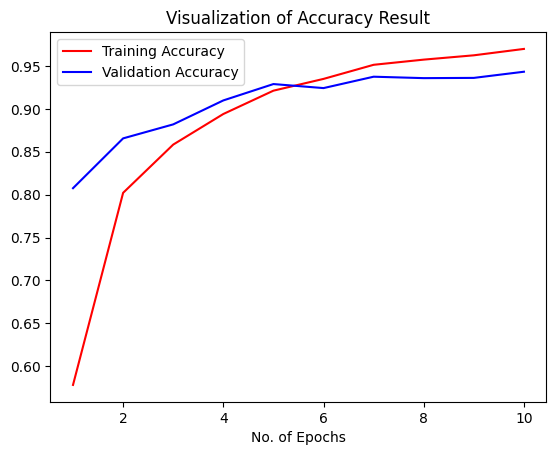

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [ ]:
class_name = validation_set.class_names

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Plant Village Dataset/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3616 files belonging to 17 classes.


In [ ]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

3616/3616 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

Y_true

<tf.Tensor: shape=(3616,), dtype=int64, numpy=array([ 0,  0,  0, ..., 16, 16, 16])>

In [ ]:
predicted_categories

<tf.Tensor: shape=(3616,), dtype=int64, numpy=array([ 0,  0,  0, ..., 16, 16, 16])>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.86      0.86      0.86        76
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       178
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.93      0.93       147
                            Corn_(maize)___healthy       0.99      0.99      0.99       174
                             Potato___Early_blight       0.85      0.99      0.91       150
                              Potato___Late_blight       0.93      0.81      0.87       150
                                  Potato___healthy       0.91      0.91      0.91        22
                           Tomato___Bacterial_spot       0.97      0.97      0.97       319
                             Tomato___Early_blight       0.75      0.89      0.82       150
                              Tomato___Late_blight       0.97      0.85      0.

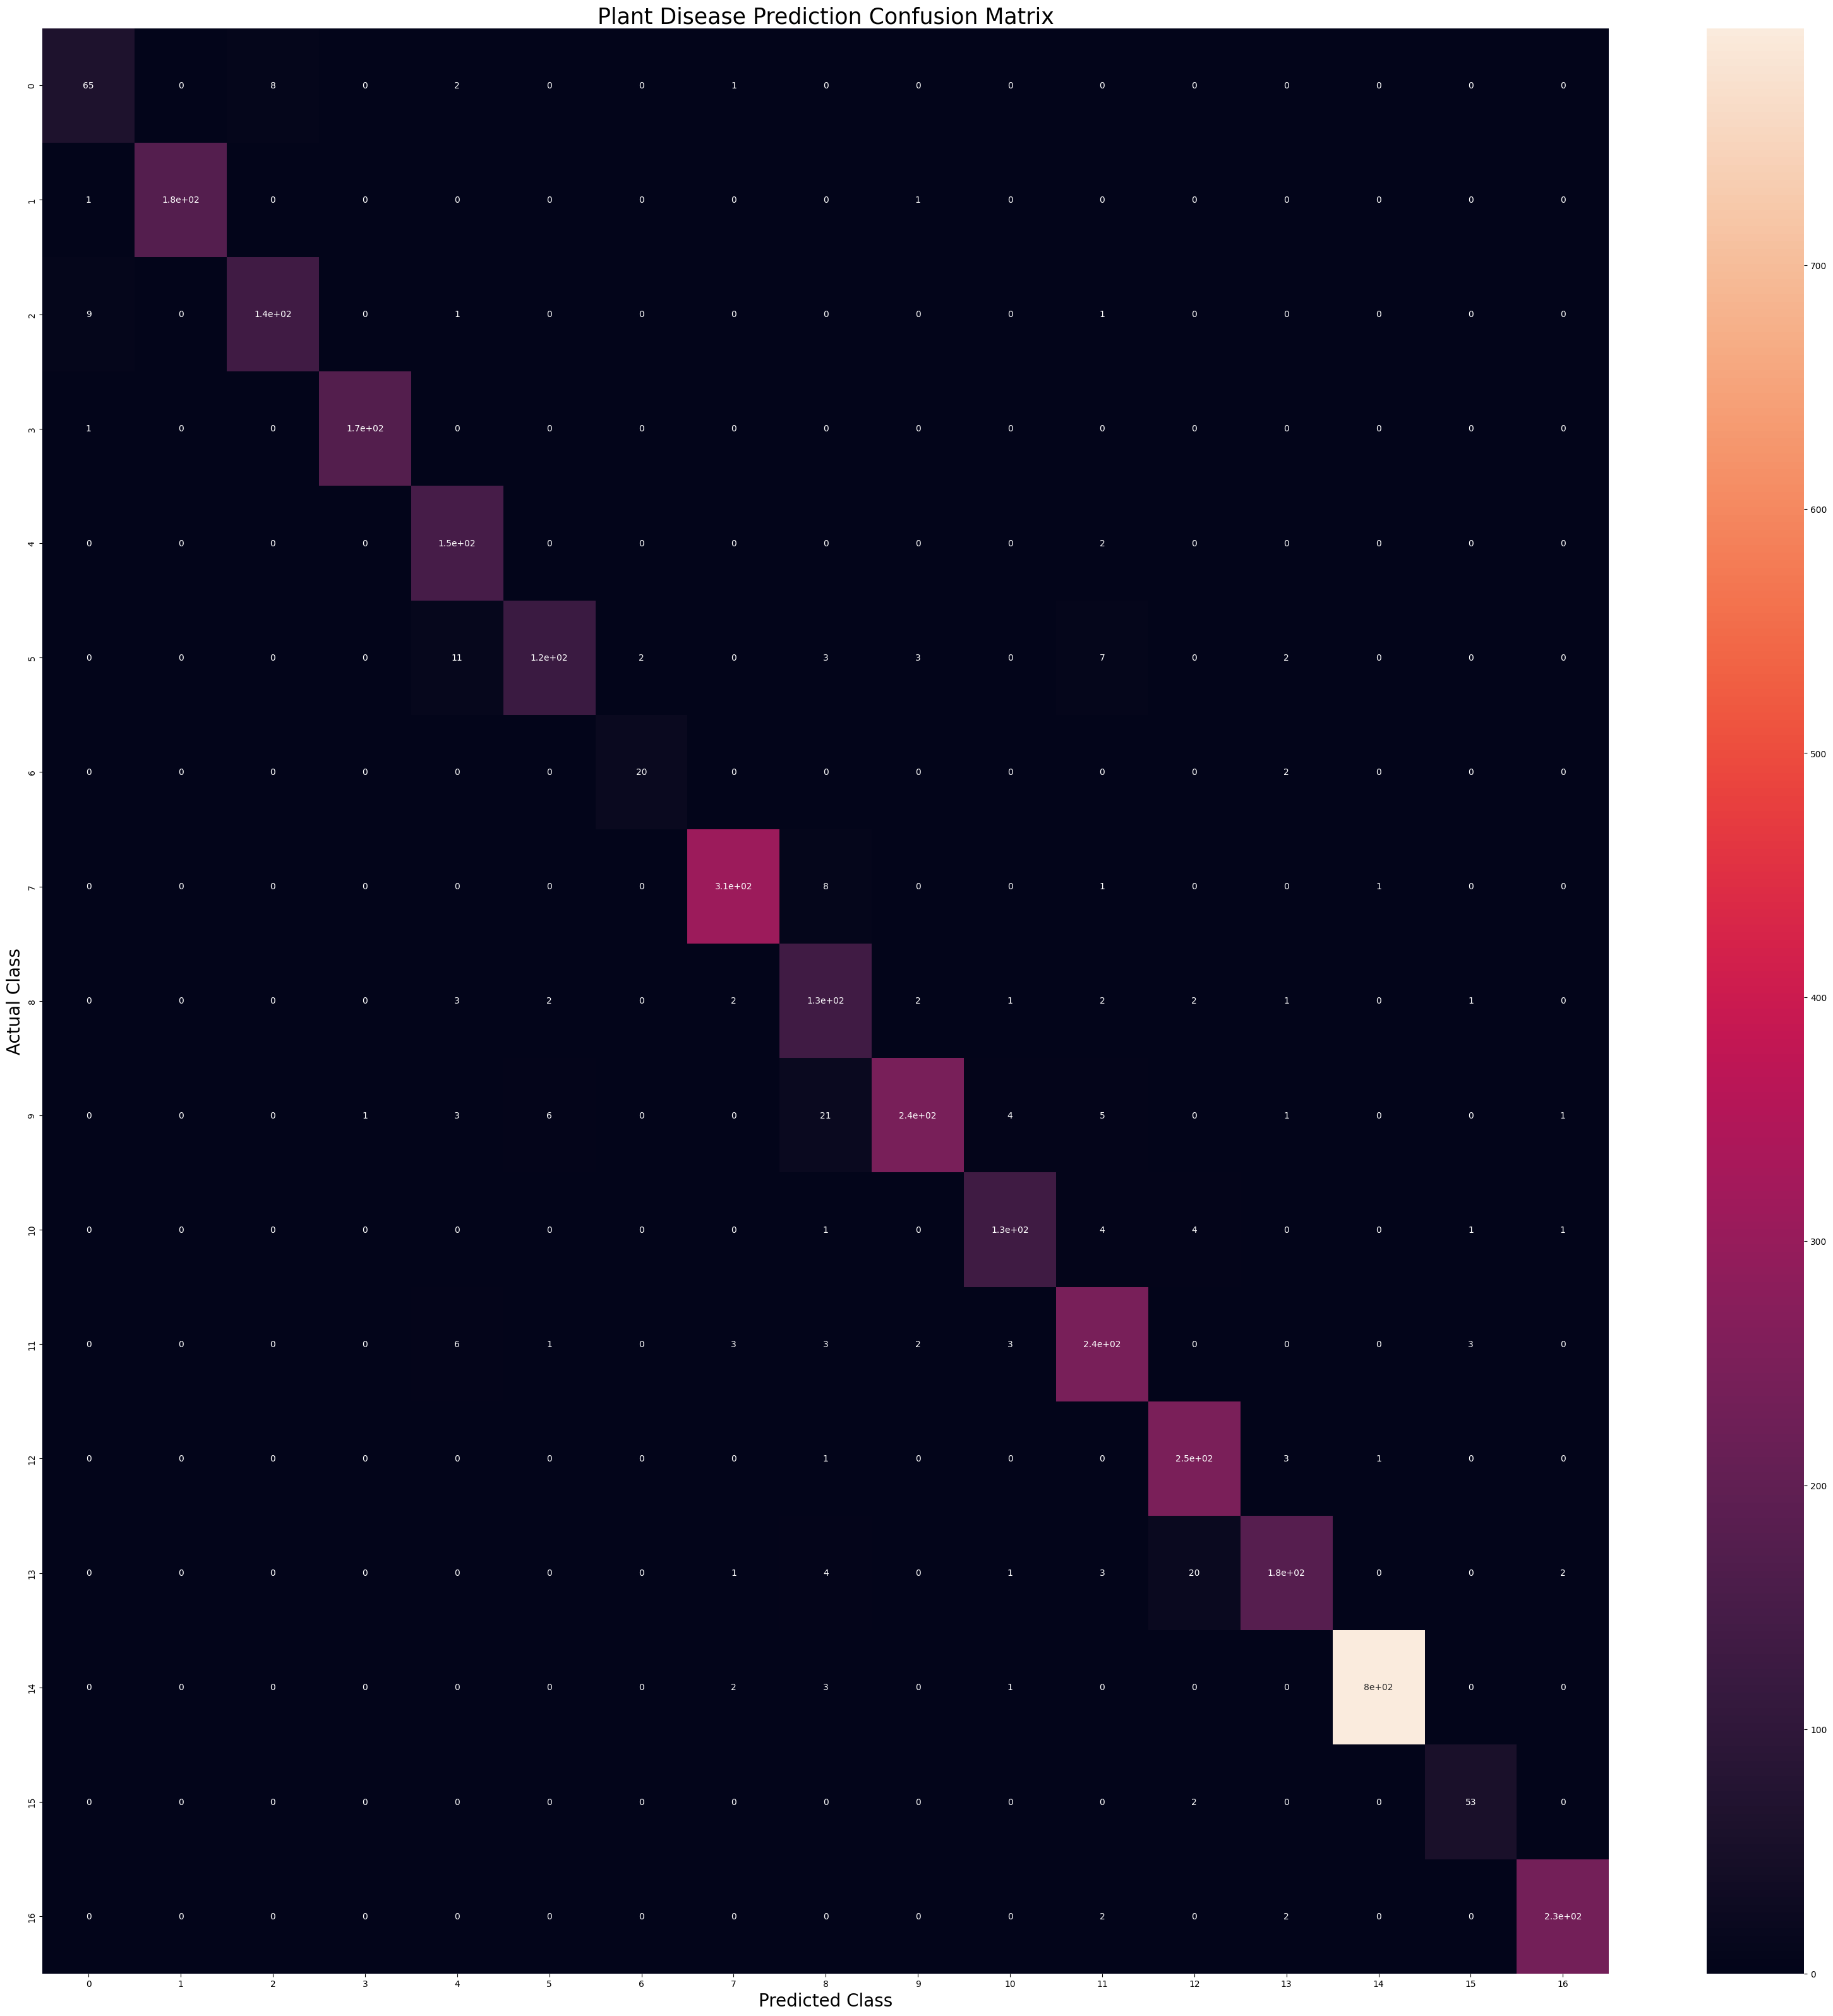

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()